https://www.kaggle.com/code/ragnisah/eda-abalone-age-prediction

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [6]:
from ucimlrepo import fetch_ucirepo
data = fetch_ucirepo(name='Abalone')
data = pd.DataFrame(data= data.data.original)

In [7]:
data['age'] = data['Rings']+1.5
data.drop('Rings', axis = 1, inplace = True)

In [8]:
print('This dataset has {} observations with {} features.'.format(data.shape[0], data.shape[1]))

This dataset has 4177 observations with 9 features.


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole_weight'}>],
       [<Axes: title={'center': 'Shucked_weight'}>,
        <Axes: title={'center': 'Viscera_weight'}>,
        <Axes: title={'center': 'Shell_weight'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

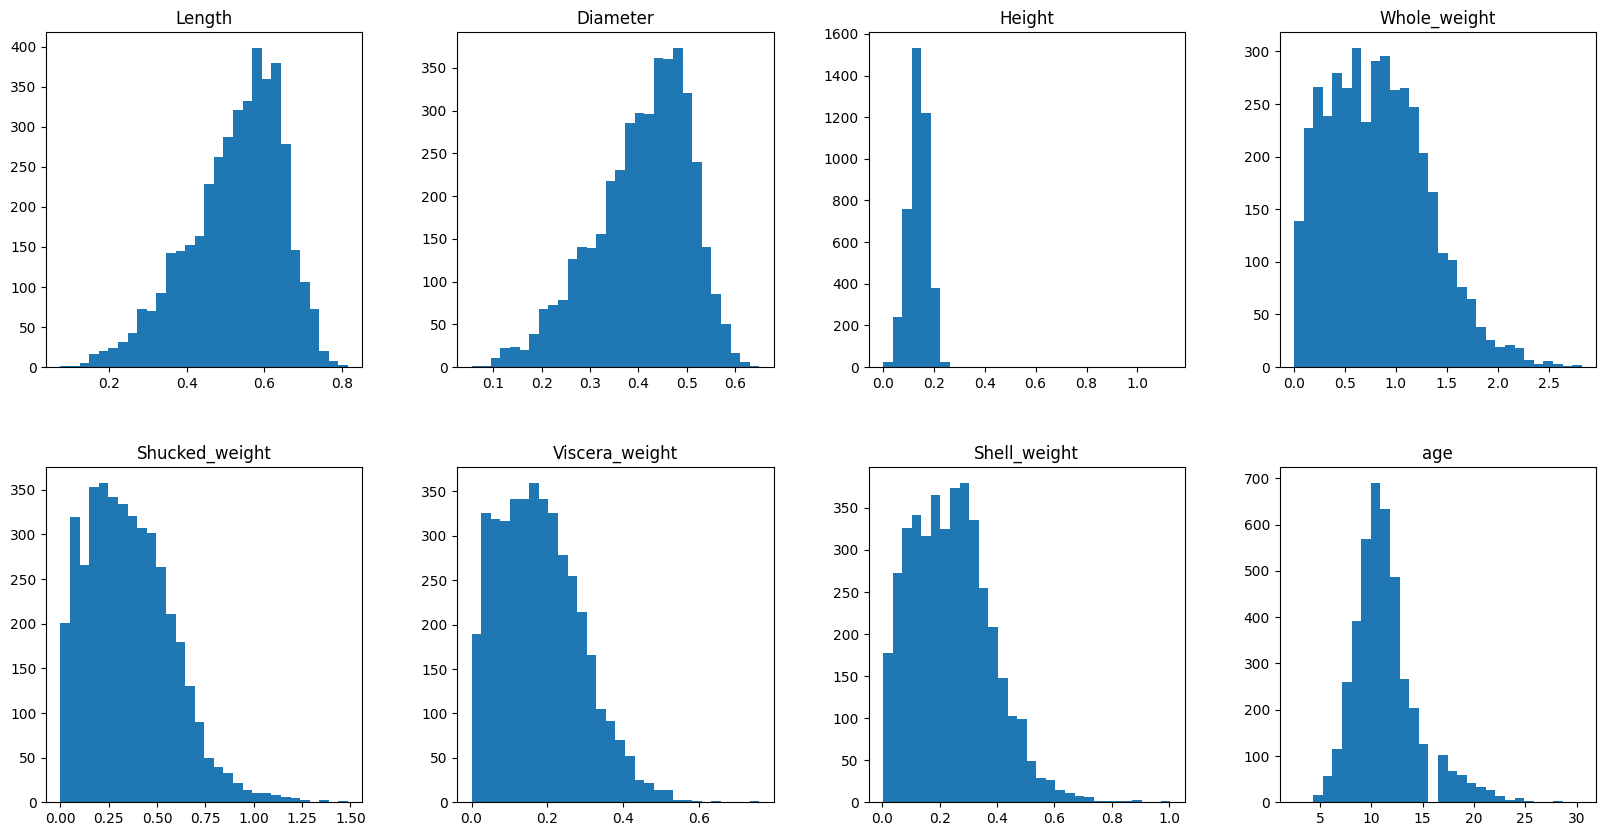

In [10]:
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [13]:
# Missing values
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole_weight,0,0.0
Shucked_weight,0,0.0
Viscera_weight,0,0.0
Shell_weight,0,0.0
age,0,0.0


<Axes: xlabel='Sex', ylabel='count'>

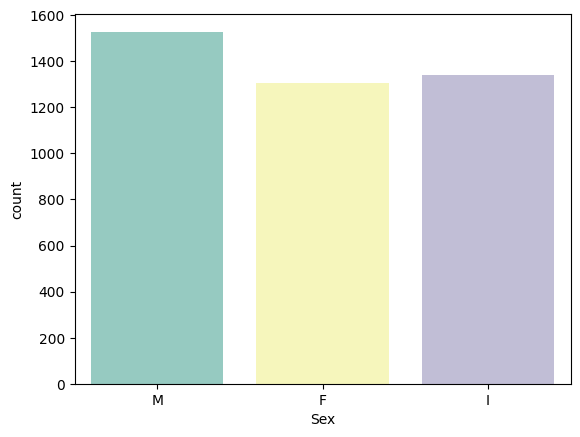

In [14]:
sns.countplot(x = 'Sex', data = data, palette="Set3")

c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Sex', ylabel='age'>

c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


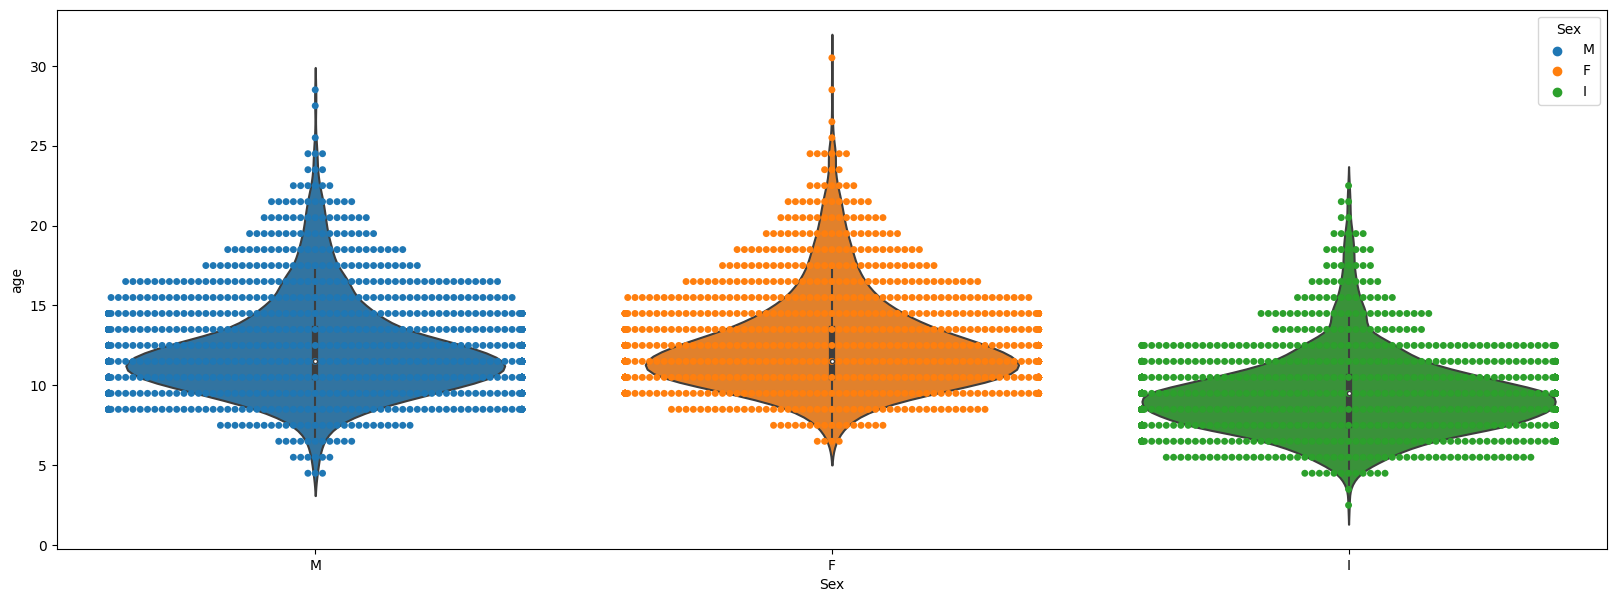

In [15]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = data, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age', data = data)

In [17]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'age']].mean().sort_values('age')

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


In [18]:
numerical_features = data.select_dtypes(include=[np.number]).columns

c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


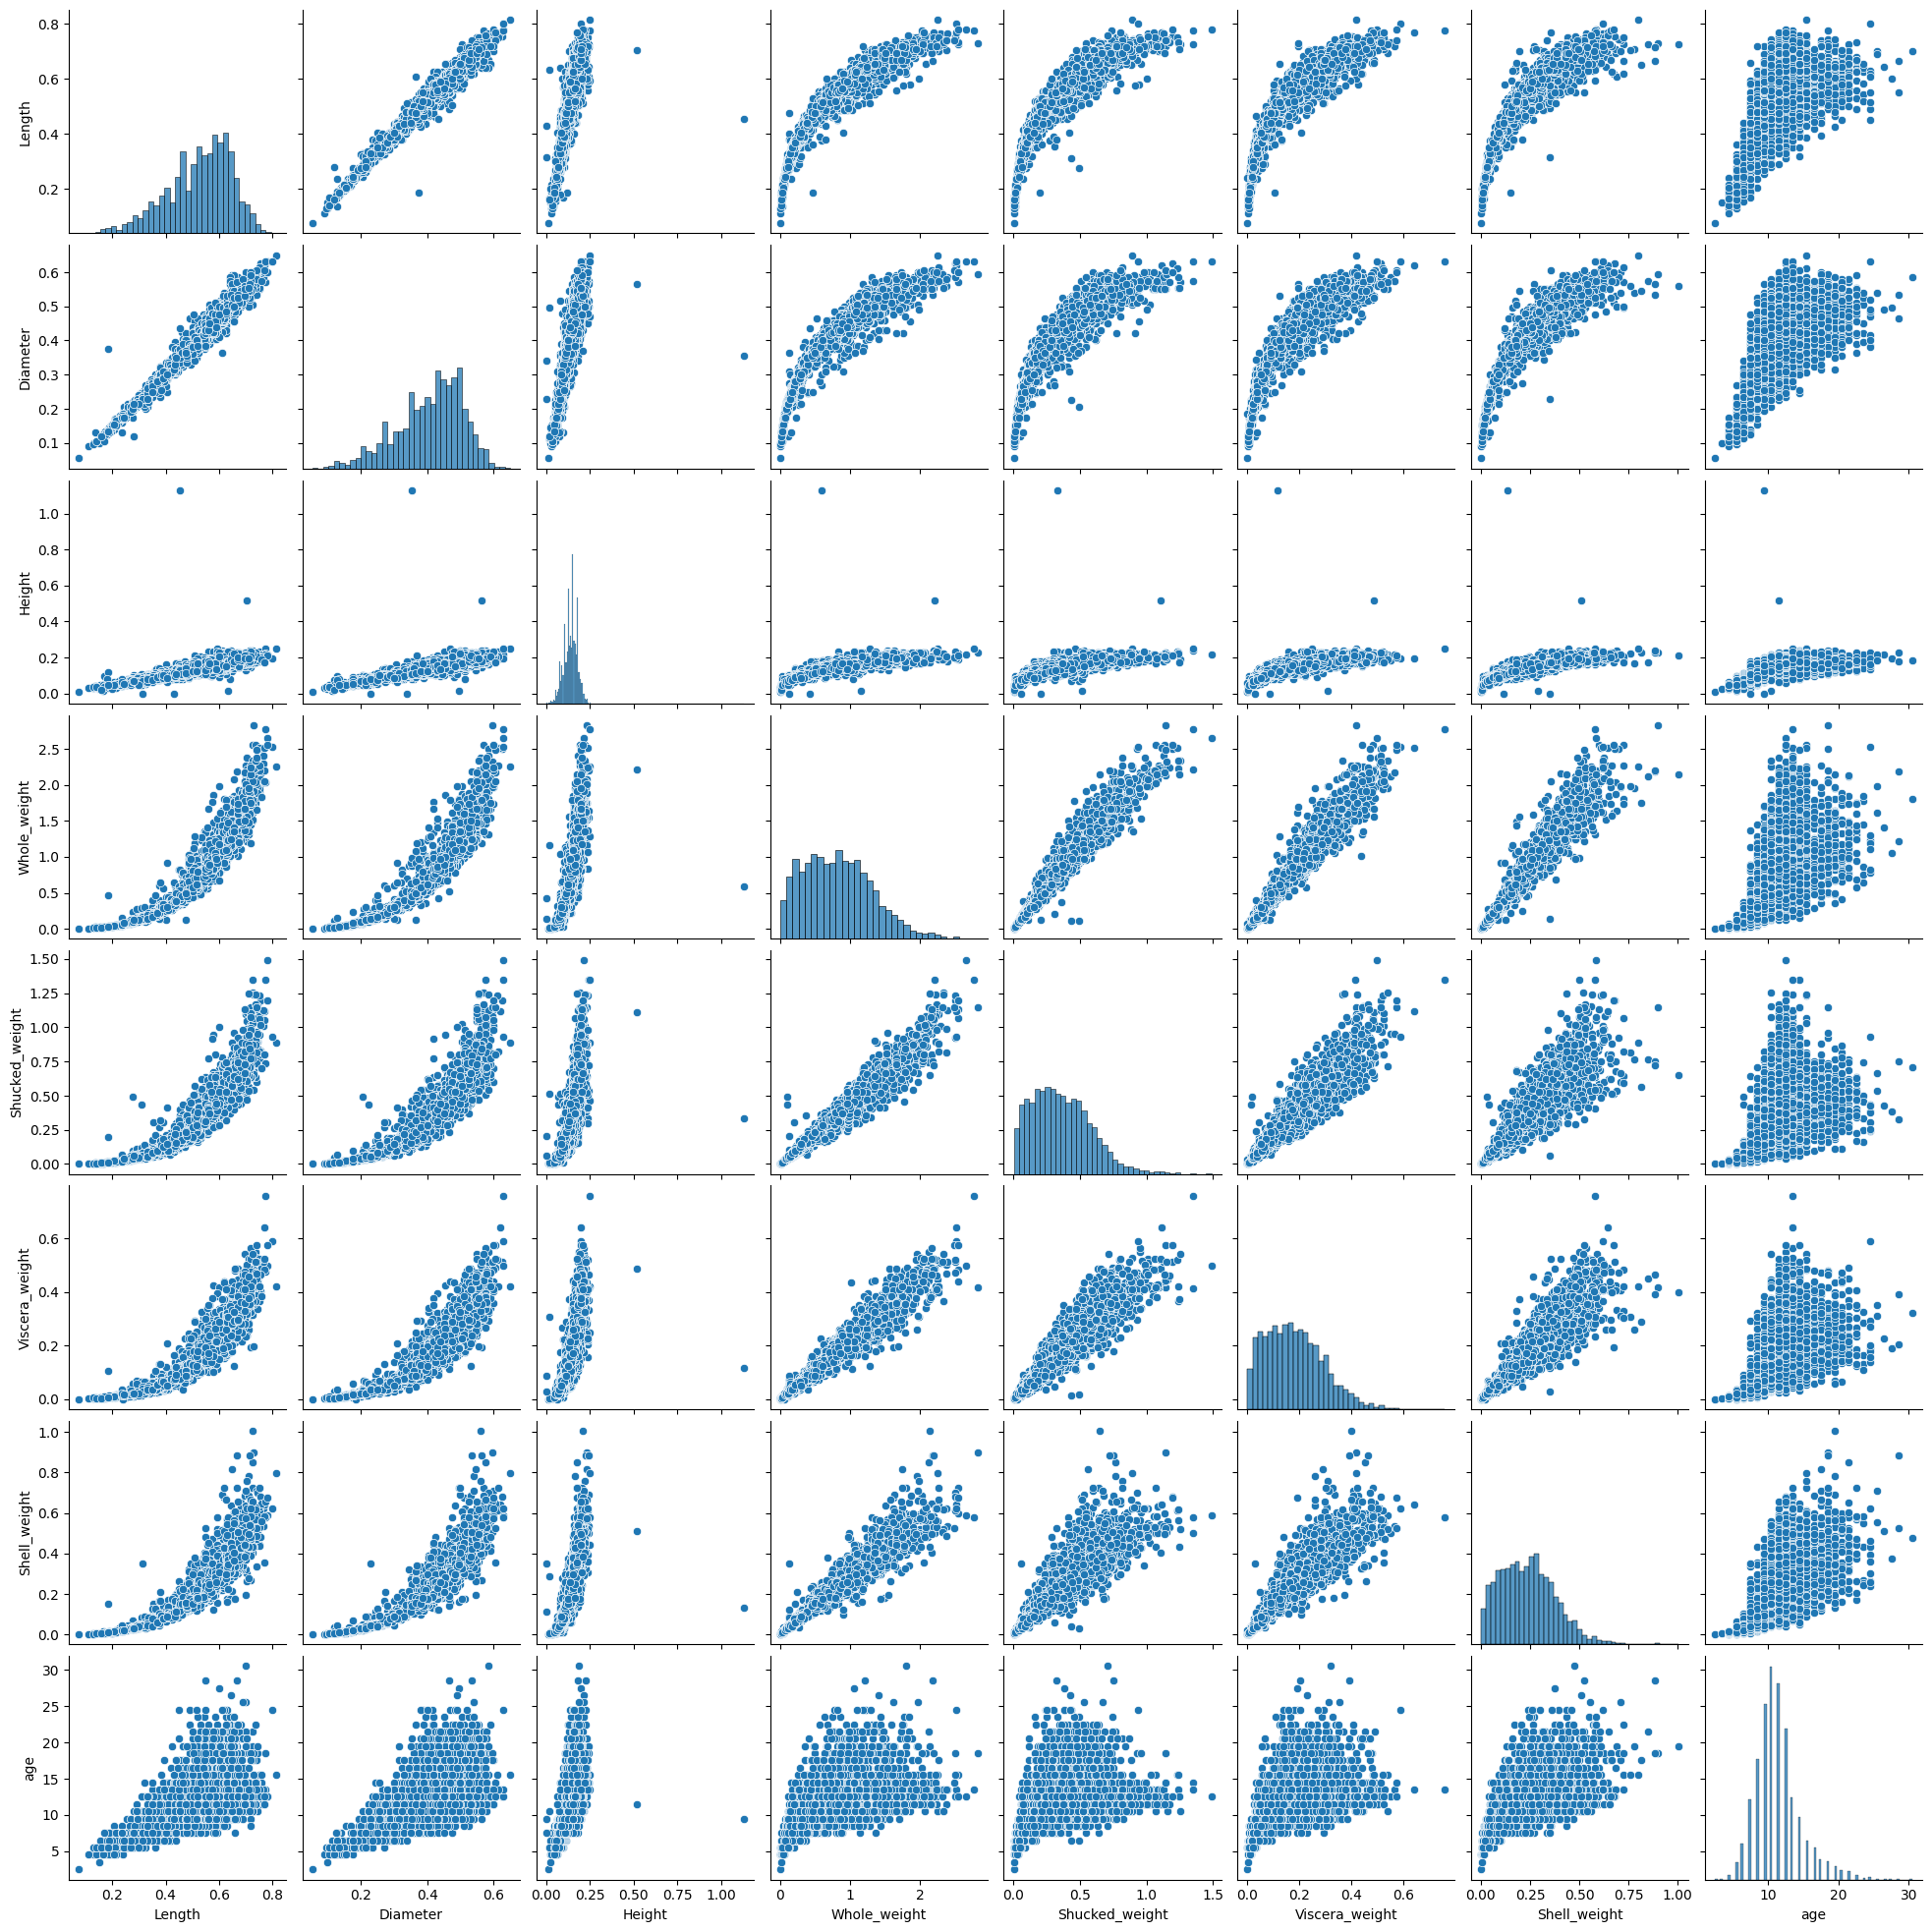

In [19]:
sns.pairplot(data[numerical_features])

<Axes: >

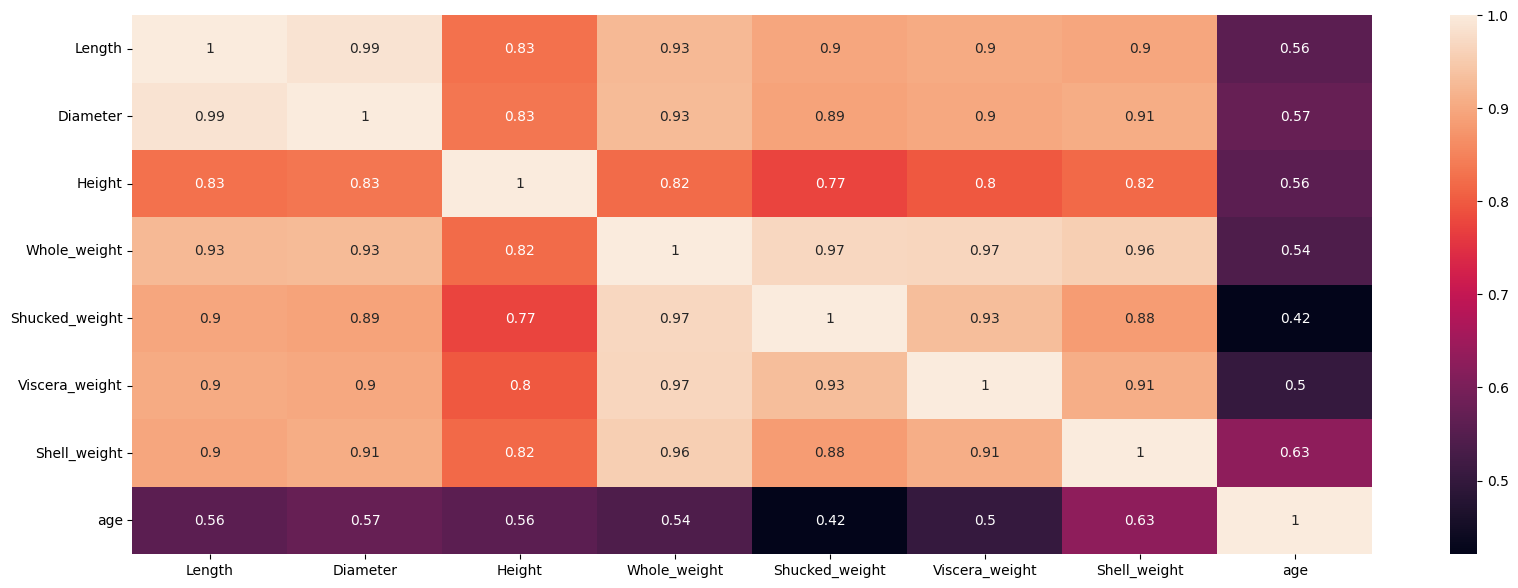

In [20]:
plt.figure(figsize=(20,7))
sns.heatmap(data[numerical_features].corr(), annot=True)

In [21]:
data = pd.get_dummies(data)
dummy_data = data.copy()

<Axes: >

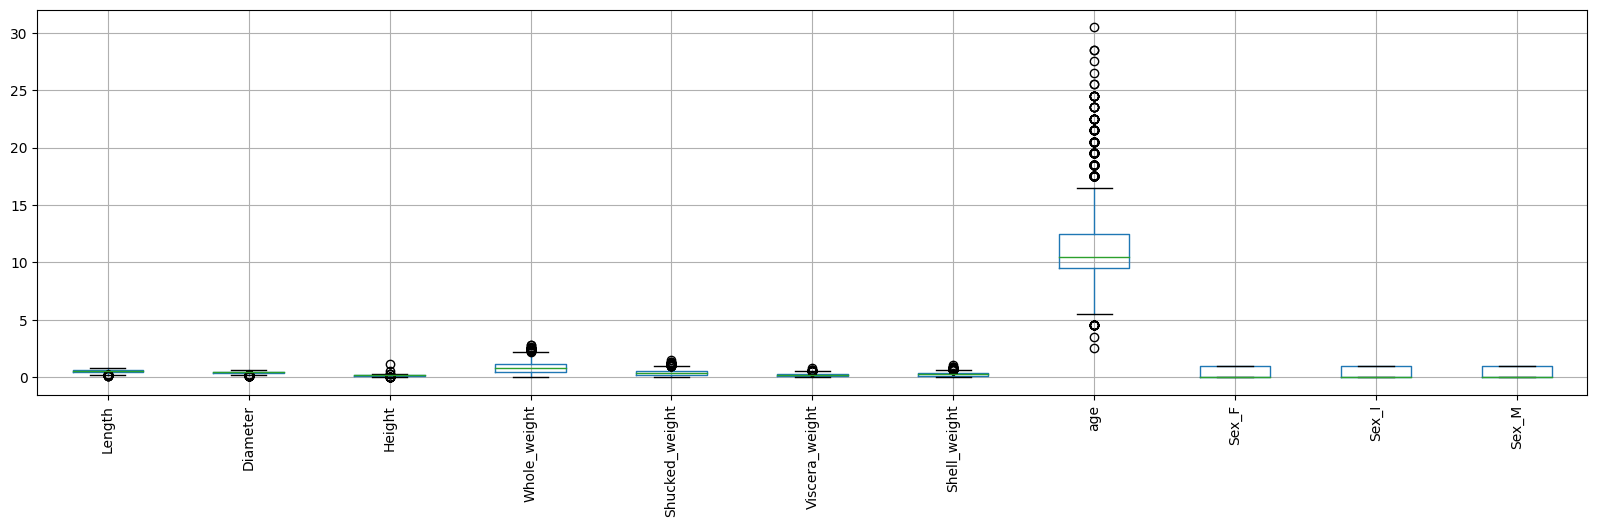

In [22]:
data.boxplot( rot = 90, figsize=(20,5))

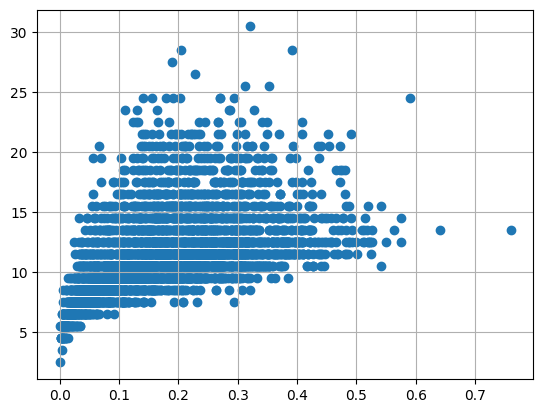

In [23]:
var = 'Viscera_weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [25]:
data.drop(data[(data['Viscera_weight']> 0.5) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Viscera_weight']<0.5) & (data['age'] > 25)].index, inplace=True)

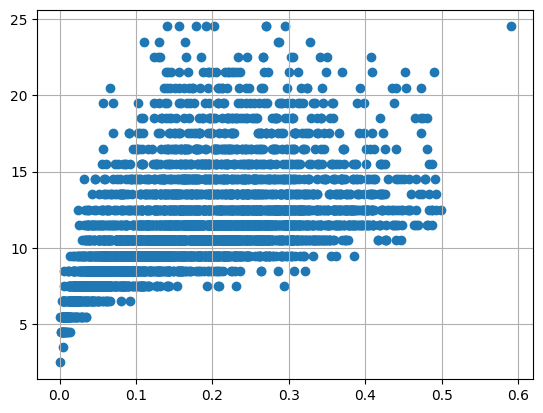

In [26]:
var = 'Viscera_weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

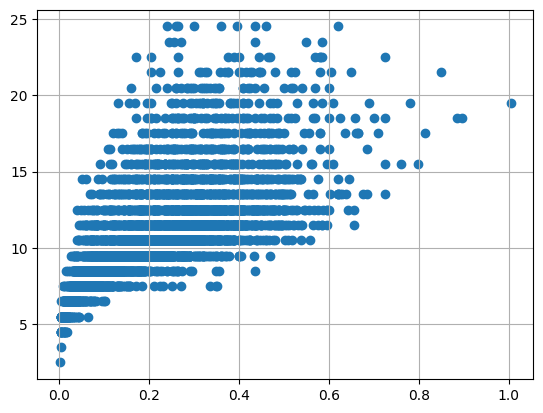

In [28]:
var = 'Shell_weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [29]:
data.drop(data[(data['Shell_weight']> 0.6) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Shell_weight']<0.8) & (data['age'] > 25)].index, inplace=True)

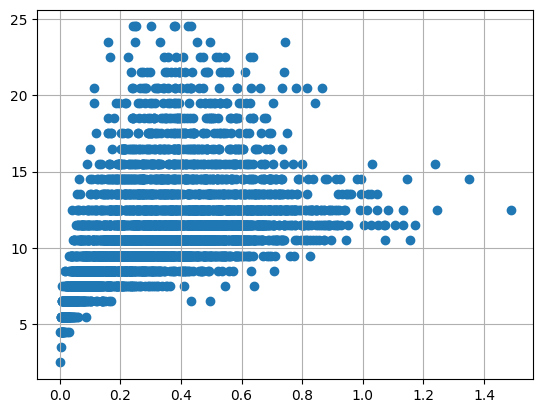

In [30]:
var = 'Shucked_weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [31]:
data.drop(data[(data['Shucked_weight']>= 1) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Shucked_weight']<1) & (data['age'] > 20)].index, inplace=True)

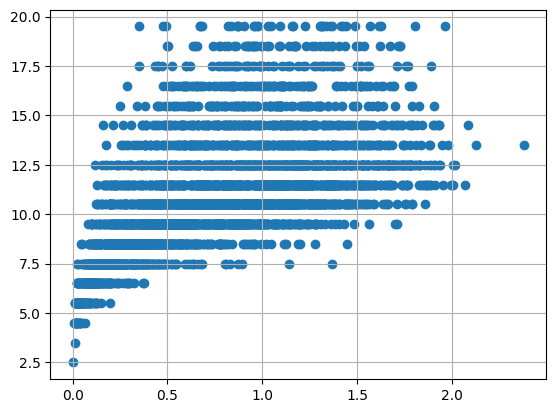

In [32]:
var = 'Whole_weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [33]:
data.drop(data[(data['Whole_weight']>= 2.5) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Whole_weight']<2.5) & (data['age'] > 25)].index, inplace=True)

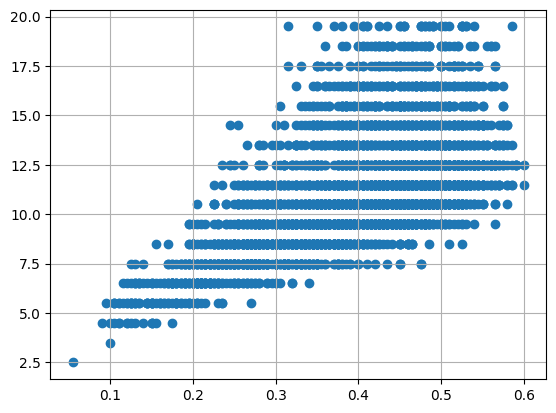

In [34]:
var = 'Diameter'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [35]:
data.drop(data[(data['Diameter']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Diameter']<0.6) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Diameter']>=0.6) & (data['age']< 25)].index, inplace=True)

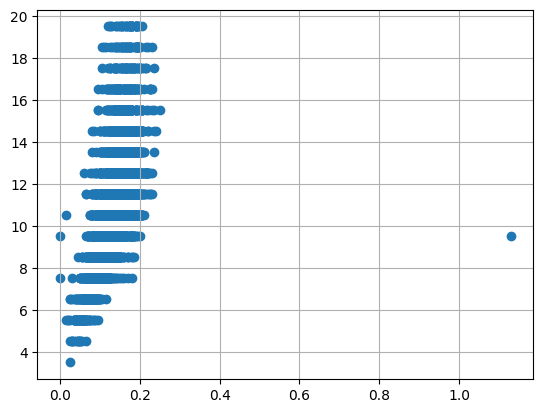

In [36]:
var = 'Height'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)


In [37]:
data.drop(data[(data['Height']>0.4) & (data['age'] < 15)].index, inplace=True)
data.drop(data[(data['Height']<0.4) & (data['age'] > 25)].index, inplace=True)

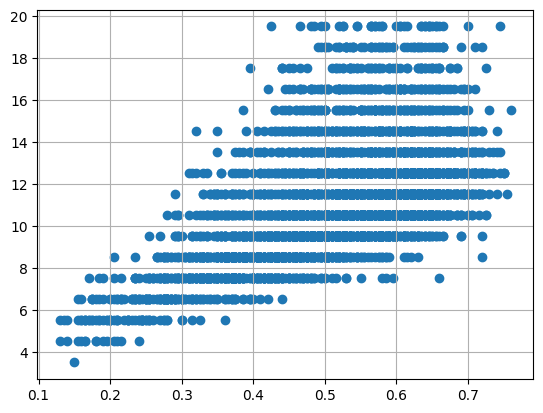

In [38]:
var = 'Length'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [39]:
data.drop(data[(data['Length']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Length']<0.8) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Length']>=0.8) & (data['age']< 25)].index, inplace=True)

In [40]:
X = data.drop('age', axis = 1)
y = data['age']

In [41]:
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

In [42]:
np.random.seed(10)
def rmse_cv(model, X_train, y):
    rmse =- (cross_val_score(model, X_train, y, scoring='neg_mean_squared_error', cv=5))
    return(rmse*100)

models = [LinearRegression(),
             Ridge(),
             SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4),]

names = ['LR','Ridge','svm','GNB','RF','GB','KNN']

for model,name in zip(models,names):
    score = rmse_cv(model,X_train,y_train)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 353.548267, 26.349295
Ridge    : 360.574799, 25.631158
svm    : 378.160860, 38.638482
GNB    : 347.888178, 30.356743
RF    : 337.281403, 24.300219
GB    : 391.954274, 36.051865


In [43]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['age'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = -cross_val_score(alg, dtrain[predictors], dtrain['age'], cv=cv_folds, 
                                                    scoring='r2')
    
    #Print model report:
    print ("\nModel Report")
    print( "RMSE : %.4g" % mean_squared_error(dtrain['age'].values, dtrain_predictions))
    print( "R2 Score (Train): %f" % r2_score(dtrain['age'], dtrain_predictions))
    
    if performCV:
        print( "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),
                                                                                 np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.coef_, predictors).sort_values(ascending=False)
        plt.figure(figsize=(20,4))
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
RMSE : 3.593
R2 Score (Train): 0.529894
CV Score : Mean - -0.4503433 | Std - 0.08079434 | Min - -0.514565 | Max - -0.3061263


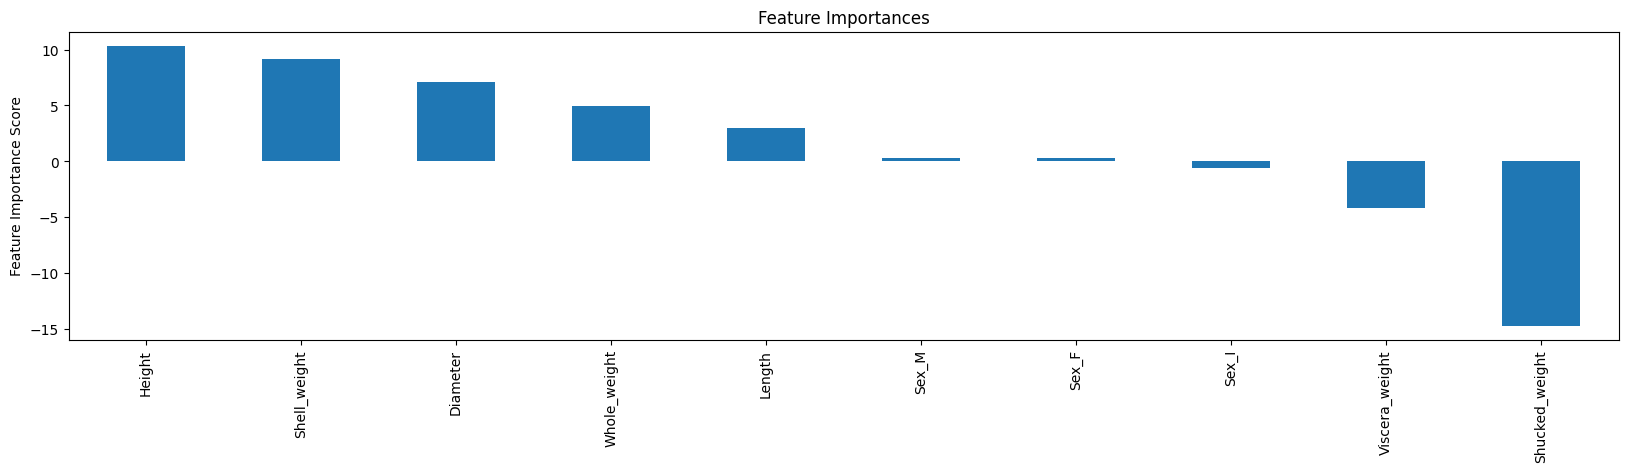

In [44]:
# Base Model
predictors = [x for x in data.columns if x not in ['age']]
lrm0 = Ridge(random_state=10)
modelfit(lrm0, data, predictors)

In [45]:
# Let's do hyperparameter tunning using GrideSearchCV
from sklearn.model_selection import  GridSearchCV
param  = {'alpha':[0.01, 0.1, 1,10,100],
         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
glrm0 = GridSearchCV(estimator = Ridge(random_state=10,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
glrm0.fit(X_train, y_train)
glrm0.best_params_, glrm0.best_score_

({'alpha': 0.01, 'solver': 'sparse_cg'}, 0.5277493063054297)


Model Report
RMSE : 3.558
R2 Score (Train): 0.534426
CV Score : Mean - -0.4543985 | Std - 0.08665801 | Min - -0.5172686 | Max - -0.2913273


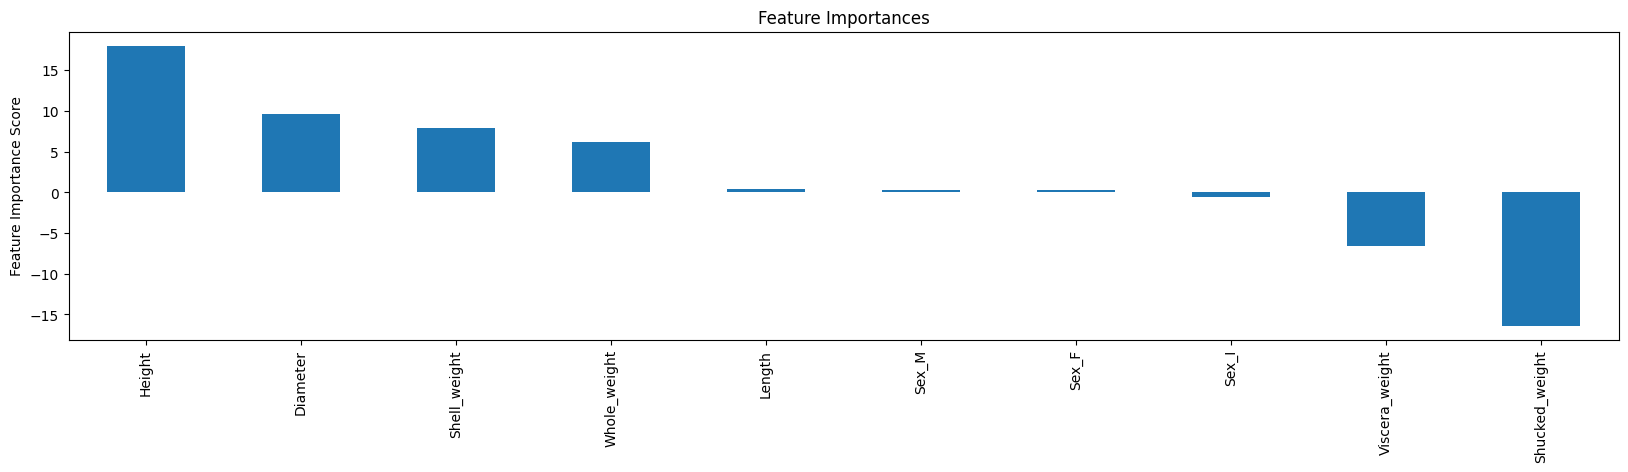

In [46]:
modelfit(Ridge(alpha = 0.1,random_state=10,), data, predictors)